In [106]:
import csv
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [13]:
salaries = 'salaries.csv'
employees = 'employees.csv'
titles = 'titles.csv'

salary_data = pd.read_csv(salaries)
emp_data = pd.read_csv(employees)
title_data = pd.read_csv(titles)


In [14]:
emp_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [15]:
salary_data.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [25]:
emp_sal = pd.merge(emp_data,salary_data,how = 'left', on =['emp_no','emp_no'])
emp_sal = emp_sal.rename(columns={'emp_title_id':'title_id'})
emp_sal.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [19]:
title_data.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [27]:
complete_df = pd.merge(emp_sal, title_data, how = 'right', on = ['title_id','title_id'])
complete_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff


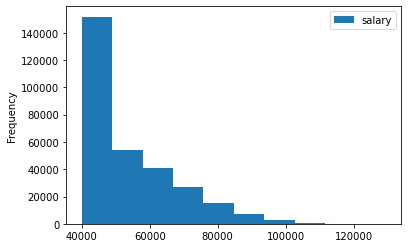

In [105]:
salary_title = complete_df[['title','salary']]
hist = salary_title.plot.hist()

In [113]:
title_names = []
for title in complete_df["title"]:
    if title not in title_names:
        title_names.append(title)
    else:
        continue

print(title_names)

['Staff', 'Engineer', 'Senior Engineer', 'Senior Staff', 'Technique Leader', 'Assistant Engineer', 'Manager']


AttributeError: module 'seaborn' has no attribute 'histogram'

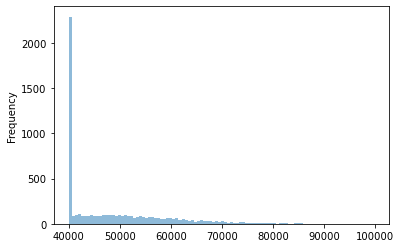

In [124]:
AE_salary = complete_df.loc[complete_df["title"]=="Assistant Engineer"]
AE_salary_data = AE_salary['salary']
AE_salary_data
ax = AE_salary_data.plot.hist(bins=100, alpha = 0.5)

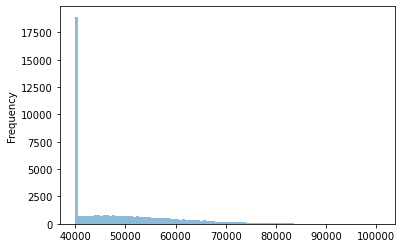

In [126]:
eng_salary = complete_df.loc[complete_df["title"]=="Engineer"]
eng_salary_data = eng_salary['salary']
eng_salary_data
ax = eng_salary_data.plot.hist(bins=100, alpha = 0.5)

In [67]:
grouped = complete_df.groupby(['title']).mean()['salary']
grouped

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [71]:
summary = complete_df.groupby("title").agg({"salary":['var','sem','std','mean','median']})
summary

salary                                           \
                             var          sem           std          mean   
title                                                                       
Assistant Engineer  1.057043e+08   134.594059  10281.259519  48564.434447   
Engineer            1.069293e+08    47.544912  10340.663069  48535.336511   
Manager             1.456397e+08  2463.396460  12068.128725  51531.041667   
Senior Engineer     1.051134e+08    32.792710  10252.482143  48506.799871   
Senior Staff        2.713884e+08   101.040065  16473.869221  58550.172704   
Staff               2.722337e+08    50.350197  16499.506888  58465.382850   
Technique Leader    1.064063e+08    83.811961  10315.342481  48582.896092   

                             
                     median  
title                        
Assistant Engineer  44588.0  
Engineer            44478.0  
Manager             48458.5  
Senior Engineer     44502.0  
Senior Staff        56585.0  
Staff               56407.0  
Technique Leader    44546.0

In [53]:
grouped.describe()

count        7.000000
mean     51819.437735
std       4697.227740
min      48506.799871
25%      48549.885479
50%      48582.896092
75%      54998.212258
max      58550.172704
Name: salary, dtype: float64

In [78]:
grouped.mode()

0    48506.799871
1    48535.336511
2    48564.434447
3    48582.896092
4    51531.041667
5    58465.382850
6    58550.172704
dtype: float64